# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pdp

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\183913179.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

# Data Cleaning

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

         flight_day  wants_extra_baggage  wants_preferred_seat  \
count  50000.000000         50000.000000          50000.000000   
mean       3.814420             0.668780              0.296960   
std        1.992792             0.470657              0.456923   
min        1.000000             0.000000              0.000000   
25%        2.000000             0.000000              0.000000   
50%        4.000000             1.000000              0.000000   
75%        5.000000             1.000000              1.000000   
max        7.000000             1.000000              1.000000   

       wants_in_flight_meals  flight_duration  booking_complete  
count           50000.000000     50000.000000      50000.000000  
mean                0.427140         7.277561          0.149560  
std                 0.494668         1.496863          0.356643  
min                 0.000000         4.670000          0.000000  
25%                 0.000000         5.620000          0.000000  
50%                 0.000000         7.570000          0.000000  
75%                 1.000000         8.830000          0.000000  
max                 1.000000         9.500000          1.000000

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[50000 rows x 14 columns]

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [10]:
report= pdp.ProfileReport(df,title="report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# dropping duplicates

In [11]:
df1= df.drop_duplicates(keep="first")
df1

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49281 rows x 14 columns]

In [12]:
df1.isna().sum()  # no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
df1["length_of_stay"].describe()

count    49281.000000
mean        23.053976
std         33.832149
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

# Basic EDA

num_passengers


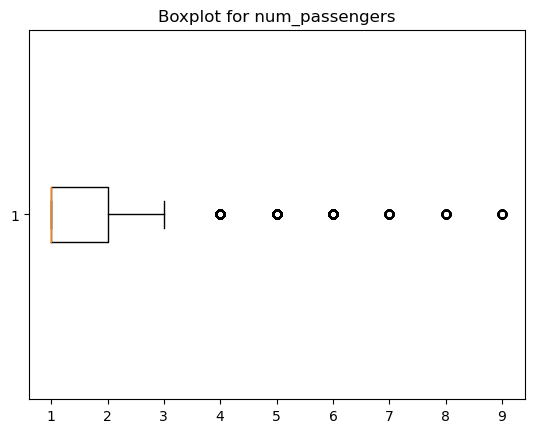

purchase_lead


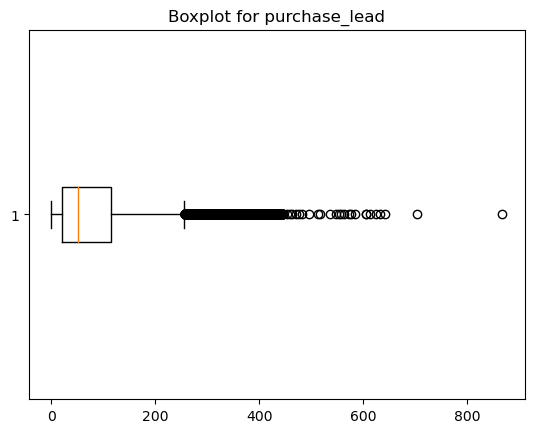

length_of_stay


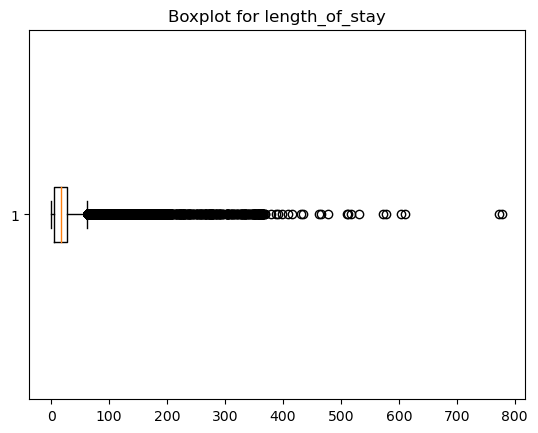

flight_hour


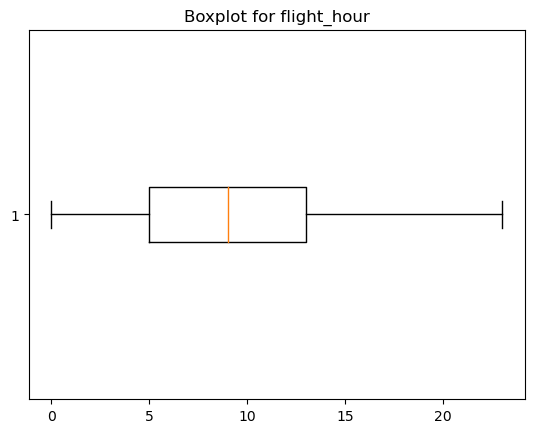

flight_day


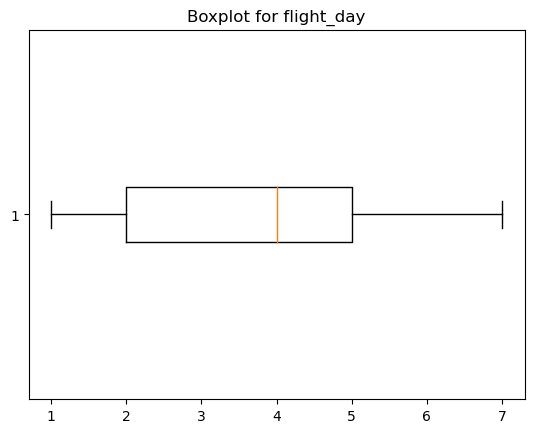

wants_extra_baggage


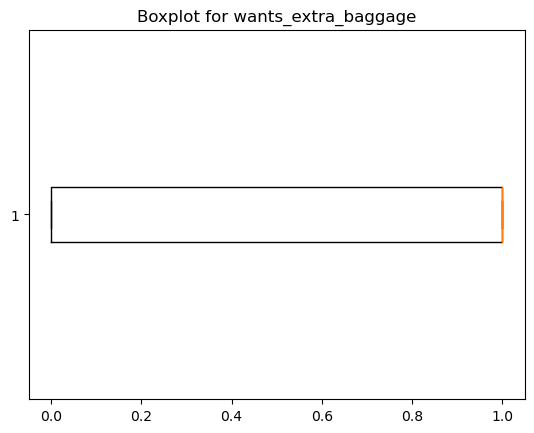

wants_preferred_seat


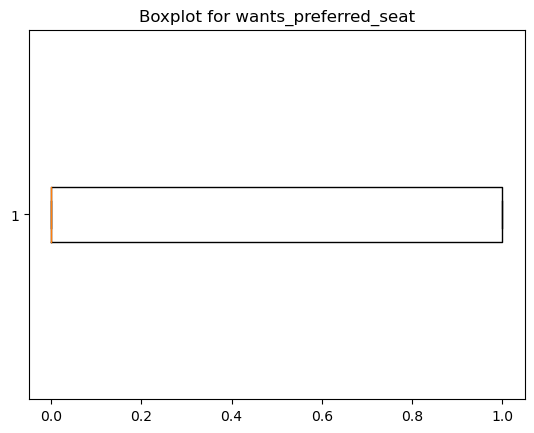

wants_in_flight_meals


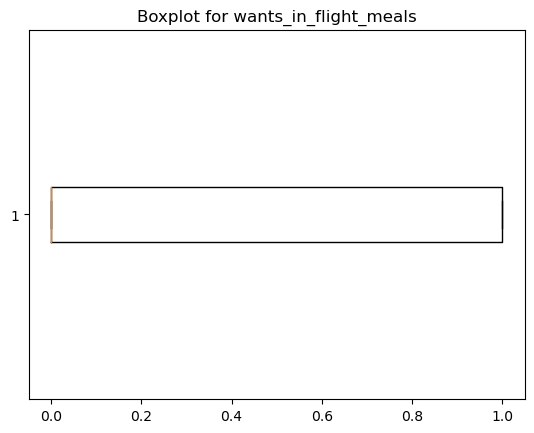

flight_duration


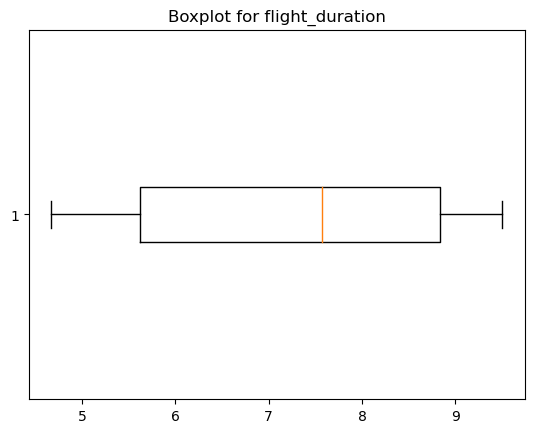

booking_complete


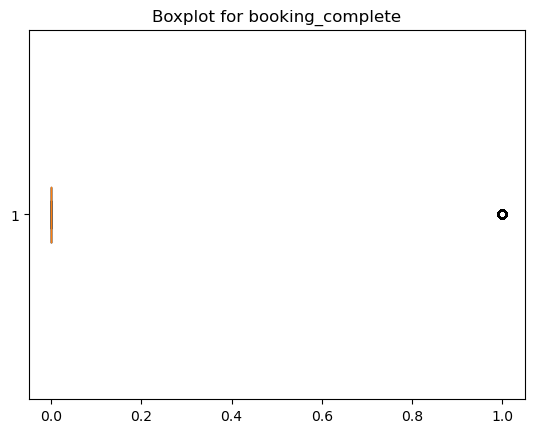

In [15]:
for column in df1:
    if df1[column].dtype in ['int64', 'float64', 'bool']:
        print(column)
        plt.boxplot(x=df1[column], vert=False)
        plt.title(f'Boxplot for {column}')
        plt.show()

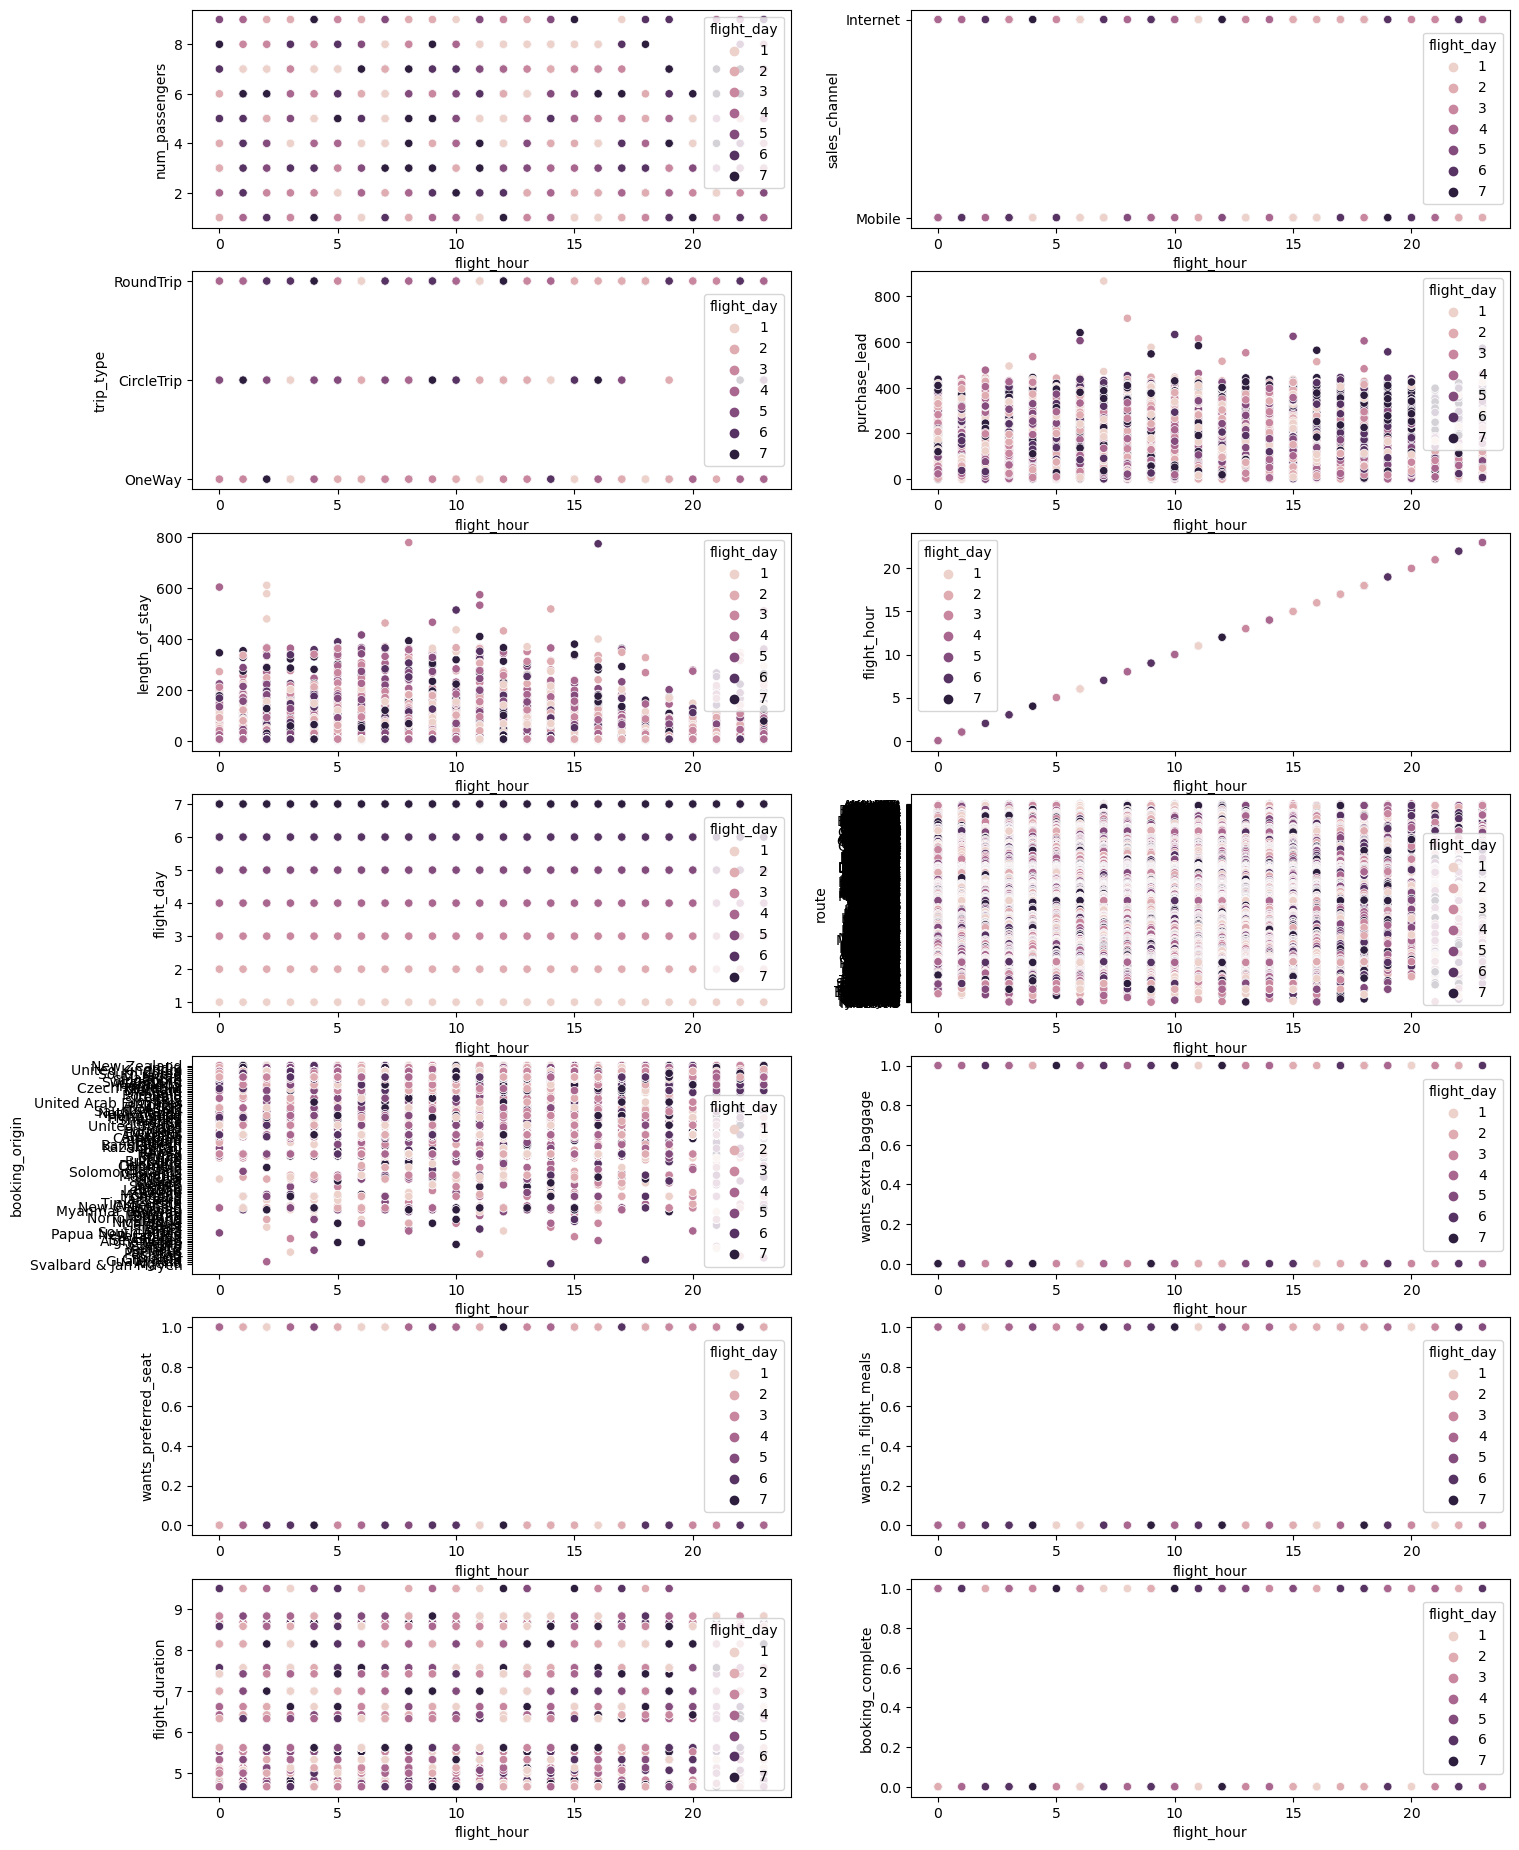

In [16]:
# scatter
plt.figure(figsize=(17, 30))
for i in range(0,len(df1.columns)):
    plt.subplot(9,2,i+1)
    sns.scatterplot(data=df1,x="flight_hour",y=df1.iloc[:,i],color="b",hue="flight_day")
    plt.xlabel("flight_hour")

<Figure size 640x480 with 0 Axes>

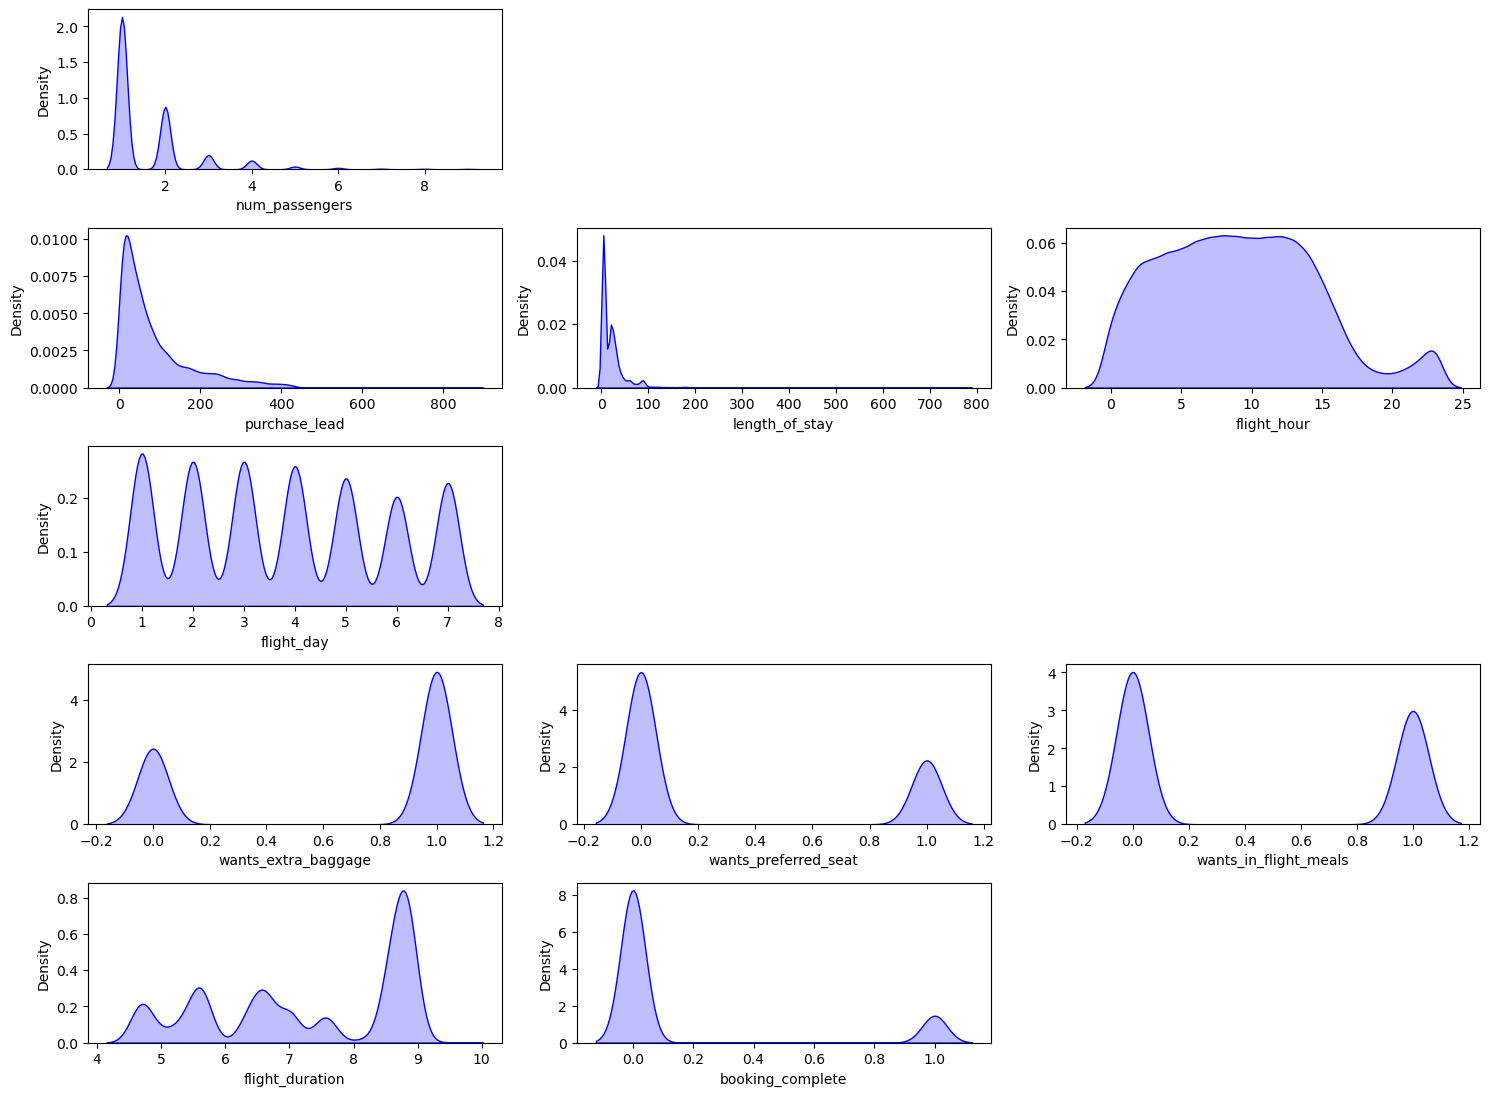

In [17]:
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.figure(figsize=(15, 15))

# Iterate over columns and their data types
for i, column in enumerate(df1.columns):
    if df1[column].dtype in ['int64', 'float64']:
        plt.subplot(7, 3, i + 1)
        sns.kdeplot(x=df1[column], shade=True, color="b")
        plt.xlabel(column)
        plt.tight_layout()

# Show the plot
plt.show()


In [18]:
df1["route"].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

# INSIGHTS

**5 - 15 hr is the average Flight time**

**15% completed the booking**

**Australia,Malaysia, Soth korea, japan are top 4 contries people Boared their flight**

**People usually stay 3-6 days at their Destination**

In [19]:
# from above observations we get **purchase_lead has lots of outliars**
# but these outliars are real data
# we need to analyzise these to remeove or not

In [20]:
# analyzing outliars in purchase lead

{'whiskers': [<matplotlib.lines.Line2D at 0x1f77b4db430>,
 'caps': [<matplotlib.lines.Line2D at 0x1f77b4db9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f77b4db160>],
 'medians': [<matplotlib.lines.Line2D at 0x1f77b4dbf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f77b4d6280>],
 'means': []}

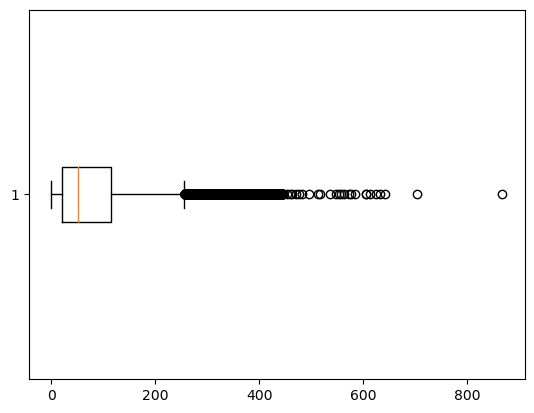

In [21]:
plt.boxplot(df1["purchase_lead"],vert=False)

In [22]:
outliar=df1[df1["purchase_lead"]>=250] #3674 outliars
outliar

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
9                   1        Mobile  RoundTrip            378              30   
12                  4      Internet  RoundTrip            265              24   
16                  1      Internet  RoundTrip            259              37   
19                  1      Internet  RoundTrip            351              17   
...               ...           ...        ...            ...             ...   
49955               2      Internet  RoundTrip            366               6   
49967               3      Internet  RoundTrip            279               6   
49973               2      Internet  RoundTrip            333               6   
49975               1      Internet  RoundTrip            265               6   
49981               1      Internet  RoundTrip            317               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
9               12           7  AKLDEL          India                    0   
12              19           1  AKLDEL    New Zealand                    1   
16               6           7  AKLDEL          India                    0   
19               3           7  AKLHGH          China                    0   
...            ...         ...     ...            ...                  ...   
49955            2           2  PENTPE       Malaysia                    1   
49967           13           5  PENTPE       Malaysia                    1   
49973            6           4  PENTPE       Malaysia                    1   
49975           12           2  PENTPE         Taiwan                    0   
49981            1           4  PENXIY       Malaysia                    1   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
9                         0                      0             5.52   
12                        0                      1             5.52   
16                        0                      0             5.52   
19                        0                      0             5.07   
...                     ...                    ...              ...   
49955                     0                      0             4.67   
49967                     0                      0             4.67   
49973                     0                      1             4.67   
49975                     0                      0             4.67   
49981                     0                      1             5.00   

       booking_complete  
0                     0  
9                     0  
12                    0  
16                    0  
19                    0  
...                 ...  
49955                 1  
49967                 1  
49973                 0  
49975                 0  
49981                 0  

[3674 rows x 14 columns]

In [23]:
outliar[outliar["booking_complete"]==0]  #3142 people didnt complete booking

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
9                   1        Mobile  RoundTrip            378              30   
12                  4      Internet  RoundTrip            265              24   
16                  1      Internet  RoundTrip            259              37   
19                  1      Internet  RoundTrip            351              17   
...               ...           ...        ...            ...             ...   
49916               2      Internet  RoundTrip            380               6   
49936               2      Internet  RoundTrip            254               6   
49973               2      Internet  RoundTrip            333               6   
49975               1      Internet  RoundTrip            265               6   
49981               1      Internet  RoundTrip            317               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
9               12           7  AKLDEL          India                    0   
12              19           1  AKLDEL    New Zealand                    1   
16               6           7  AKLDEL          India                    0   
19               3           7  AKLHGH          China                    0   
...            ...         ...     ...            ...                  ...   
49916            6           7  PENTPE       Malaysia                    1   
49936            4           5  PENTPE       Malaysia                    0   
49973            6           4  PENTPE       Malaysia                    1   
49975           12           2  PENTPE         Taiwan                    0   
49981            1           4  PENXIY       Malaysia                    1   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
9                         0                      0             5.52   
12                        0                      1             5.52   
16                        0                      0             5.52   
19                        0                      0             5.07   
...                     ...                    ...              ...   
49916                     0                      0             4.67   
49936                     0                      0             4.67   
49973                     0                      1             4.67   
49975                     0                      0             4.67   
49981                     0                      1             5.00   

       booking_complete  
0                     0  
9                     0  
12                    0  
16                    0  
19                    0  
...                 ...  
49916                 0  
49936                 0  
49973                 0  
49975                 0  
49981                 0  

[3142 rows x 14 columns]

In [24]:
outliar[outliar["booking_complete"]==1] # from outliar only 532 people completed booking

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
201                 4      Internet  RoundTrip            316              22   
270                 1      Internet  RoundTrip            259              82   
320                 2      Internet  RoundTrip            368              65   
329                 1      Internet  RoundTrip            410              25   
350                 2      Internet  RoundTrip            326              22   
...               ...           ...        ...            ...             ...   
49894               5      Internet  RoundTrip            364               6   
49943               4      Internet  RoundTrip            286               6   
49953               8      Internet  RoundTrip            328               6   
49955               2      Internet  RoundTrip            366               6   
49967               3      Internet  RoundTrip            279               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
201             14           4  AKLKUL       Malaysia                    1   
270              9           7  AKLKUL       Malaysia                    1   
320              2           7  AKLKUL       Malaysia                    1   
329             13           6  AKLKUL        Germany                    1   
350             12           7  AKLKUL       Malaysia                    0   
...            ...         ...     ...            ...                  ...   
49894            6           2  PENTPE       Malaysia                    1   
49943           17           6  PENTPE       Malaysia                    1   
49953           17           6  PENTPE       Malaysia                    1   
49955            2           2  PENTPE       Malaysia                    1   
49967           13           5  PENTPE       Malaysia                    1   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
201                       0                      0             8.83   
270                       0                      1             8.83   
320                       0                      1             8.83   
329                       1                      0             8.83   
350                       0                      0             8.83   
...                     ...                    ...              ...   
49894                     0                      0             4.67   
49943                     0                      1             4.67   
49953                     1                      1             4.67   
49955                     0                      0             4.67   
49967                     0                      0             4.67   

       booking_complete  
201                   1  
270                   1  
320                   1  
329                   1  
350                   1  
...                 ...  
49894                 1  
49943                 1  
49953                 1  
49955                 1  
49967                 1  

[532 rows x 14 columns]

In [25]:
# we should remove outliars since majority of people are not completing booking

In [26]:
df1 = df1[df1["purchase_lead"]<=250]

In [27]:
df1.shape                #we'll be keeping some outliars very little

(45656, 14)

In [28]:
df1["booking_complete"].value_counts(normalize=True)

0    0.849527
1    0.150473
Name: booking_complete, dtype: float64

In [29]:
df1["wants_extra_baggage"].value_counts(normalize=True)

1    0.674063
0    0.325937
Name: wants_extra_baggage, dtype: float64

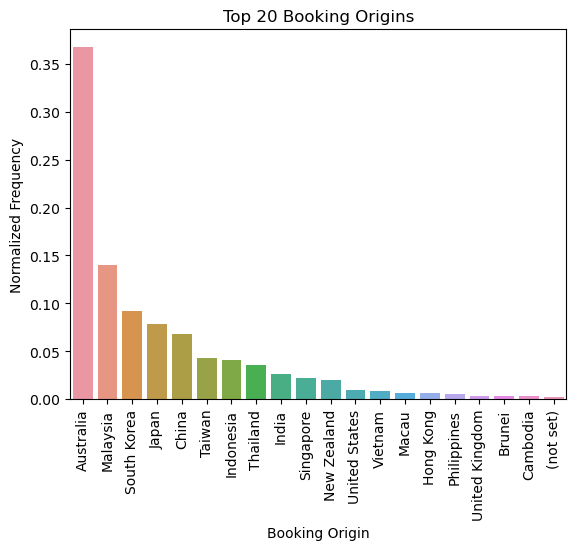

In [30]:
a=df1["booking_origin"].value_counts(normalize=True).head(20)
sns.barplot(x=a.index, y=a.values)
plt.xticks(rotation=90)
plt.xlabel("Booking Origin")
plt.ylabel("Normalized Frequency")
plt.title("Top 20 Booking Origins")
plt.show()

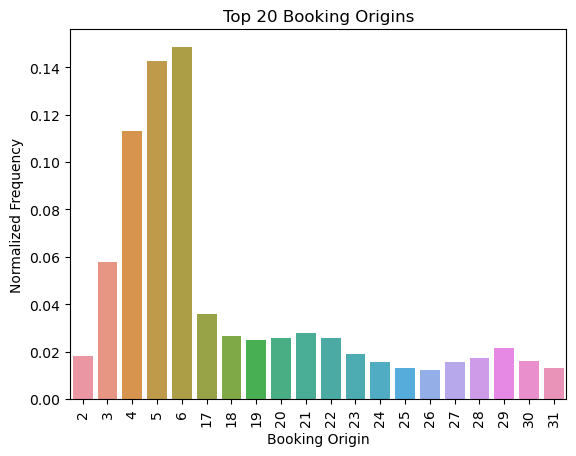

In [31]:
#
a=df1["length_of_stay"].value_counts(normalize=True).head(20)
sns.barplot(x=a.index, y=a.values)
plt.xticks(rotation=90)
plt.xlabel("Booking Origin")
plt.ylabel("Normalized Frequency")
plt.title("Top 20 Booking Origins")
plt.show()

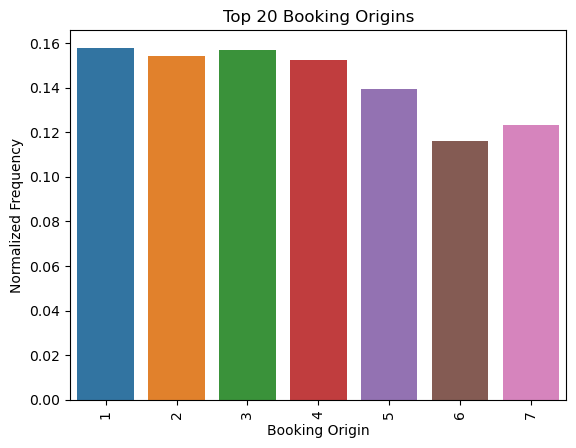

In [32]:
a=df1["flight_day"].value_counts(normalize=True).head(20)
sns.barplot(x=a.index, y=a.values)
plt.xticks(rotation=90)
plt.xlabel("Booking Origin")
plt.ylabel("Normalized Frequency")
plt.title("Top 20 Booking Origins")
plt.show()

<AxesSubplot:>

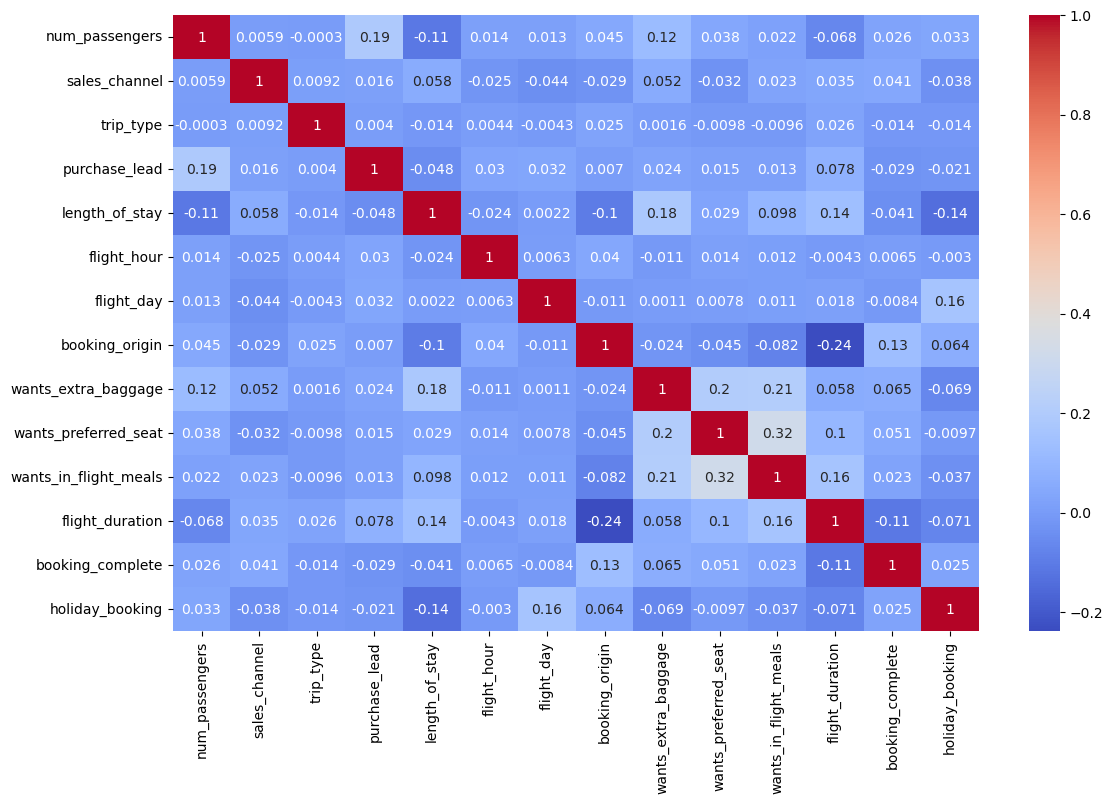

In [63]:
plt.figure(figsize=(13,8))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm") # no co-orelation

In [33]:
#now adding extra feature
# we need to check prople leaving on friday and coming back on next sunday not upcoming sunday(person go on holiday for atleast 3-9 days)
# group by these people with flight route ###*also need to consider round trip booking*

In [41]:
df1['holiday_booking'] = ((df1['flight_day'] == 5) &  # 5 represents Friday
                          (df1['length_of_stay'].between(3, 9)) &
                          (df1['trip_type'] == 'RoundTrip'))

# Print the updated DataFrame
df1

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\637214638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['holiday_booking'] = ((df1['flight_day'] == 5) &  # 5 represents Friday


num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
5                   1      Internet  RoundTrip              3              48   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
5               20           4  AKLDEL    New Zealand                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
5                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  holiday_booking  
1                     0            False  
2                     0            False  
3                     0            False  
4                     0            False  
5                     0            False  
...                 ...              ...  
49995                 0            False  
49996                 0            False  
49997                 0            False  
49998                 0            False  
49999                 0            False  

[45656 rows x 15 columns]

In [44]:
df1["holiday_booking"].value_counts()

False    42747
True      2909
Name: holiday_booking, dtype: int64

In [47]:
# Replace False with 0 and True with 1 in the "holiday_booking" column
df1['holiday_booking'] = df1['holiday_booking'].replace({False: 0, True: 1})

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
5                   1      Internet  RoundTrip              3              48   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\480852977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['holiday_booking'] = df1['holiday_booking'].replace({False: 0, True: 1})


In [49]:
df1.head(7)

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   
5               1      Internet  RoundTrip              3              48   
6               3      Internet  RoundTrip            201              33   
7               2      Internet  RoundTrip            238              19   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   
5           20           4  AKLDEL    New Zealand                    1   
6            6           4  AKLDEL    New Zealand                    1   
7           14           1  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   
5                     0                      1             5.52   
6                     0                      1             5.52   
7                     0                      1             5.52   

   booking_complete  holiday_booking  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
5                 0                0  
6                 0                0  
7                 0                0

In [50]:
df1['sales_channel'] = df1['sales_channel'].replace({"Internet": 1, "Mobile": 0})


C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\145924466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sales_channel'] = df1['sales_channel'].replace({"Internet": 1, "Mobile": 0})


In [51]:
df1

num_passengers  sales_channel  trip_type  purchase_lead  \
1                   1              1  RoundTrip            112   
2                   2              1  RoundTrip            243   
3                   1              1  RoundTrip             96   
4                   2              1  RoundTrip             68   
5                   1              1  RoundTrip              3   
...               ...            ...        ...            ...   
49995               2              1  RoundTrip             27   
49996               1              1  RoundTrip            111   
49997               1              1  RoundTrip             24   
49998               1              1  RoundTrip             15   
49999               1              1  RoundTrip             19   

       length_of_stay  flight_hour  flight_day   route booking_origin  \
1                  20            3           6  AKLDEL    New Zealand   
2                  22           17           3  AKLDEL          India   
3                  31            4           6  AKLDEL    New Zealand   
4                  22           15           3  AKLDEL          India   
5                  48           20           4  AKLDEL    New Zealand   
...               ...          ...         ...     ...            ...   
49995               6            9           6  PERPNH      Australia   
49996               6            4           7  PERPNH      Australia   
49997               6           22           6  PERPNH      Australia   
49998               6           11           1  PERPNH      Australia   
49999               6           10           4  PERPNH      Australia   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
5                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  booking_complete  holiday_booking  
1                 5.52                 0                0  
2                 5.52                 0                0  
3                 5.52                 0                0  
4                 5.52                 0                0  
5                 5.52                 0                0  
...                ...               ...              ...  
49995             5.62                 0                0  
49996             5.62                 0                0  
49997             5.62                 0                0  
49998             5.62                 0                0  
49999             5.62                 0                0  

[45656 rows x 15 columns]

In [52]:
df1['trip_type'] = df1['trip_type'].replace({"RoundTrip": 1, "CircleTrip": 0,"OneWay":2})
df1

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\4050298612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['trip_type'] = df1['trip_type'].replace({"RoundTrip": 1, "CircleTrip": 0,"OneWay":2})


num_passengers  sales_channel  trip_type  purchase_lead  \
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
5                   1              1          1              3   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day   route booking_origin  \
1                  20            3           6  AKLDEL    New Zealand   
2                  22           17           3  AKLDEL          India   
3                  31            4           6  AKLDEL    New Zealand   
4                  22           15           3  AKLDEL          India   
5                  48           20           4  AKLDEL    New Zealand   
...               ...          ...         ...     ...            ...   
49995               6            9           6  PERPNH      Australia   
49996               6            4           7  PERPNH      Australia   
49997               6           22           6  PERPNH      Australia   
49998               6           11           1  PERPNH      Australia   
49999               6           10           4  PERPNH      Australia   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
5                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  booking_complete  holiday_booking  
1                 5.52                 0                0  
2                 5.52                 0                0  
3                 5.52                 0                0  
4                 5.52                 0                0  
5                 5.52                 0                0  
...                ...               ...              ...  
49995             5.62                 0                0  
49996             5.62                 0                0  
49997             5.62                 0                0  
49998             5.62                 0                0  
49999             5.62                 0                0  

[45656 rows x 15 columns]

In [53]:
df1['booking_origin'] = df1['booking_origin'].astype('category').cat.codes


C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_7892\633947985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['booking_origin'] = df1['booking_origin'].astype('category').cat.codes


In [54]:
df1

num_passengers  sales_channel  trip_type  purchase_lead  \
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
5                   1              1          1              3   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day   route  booking_origin  \
1                  20            3           6  AKLDEL              59   
2                  22           17           3  AKLDEL              35   
3                  31            4           6  AKLDEL              59   
4                  22           15           3  AKLDEL              35   
5                  48           20           4  AKLDEL              59   
...               ...          ...         ...     ...             ...   
49995               6            9           6  PERPNH               4   
49996               6            4           7  PERPNH               4   
49997               6           22           6  PERPNH               4   
49998               6           11           1  PERPNH               4   
49999               6           10           4  PERPNH               4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
5                        1                     0                      1   
...                    ...                   ...                    ...   
49995                    1                     0                      1   
49996                    0                     0                      0   
49997                    0                     0                      1   
49998                    1                     0                      1   
49999                    0                     1                      0   

       flight_duration  booking_complete  holiday_booking  
1                 5.52                 0                0  
2                 5.52                 0                0  
3                 5.52                 0                0  
4                 5.52                 0                0  
5                 5.52                 0                0  
...                ...               ...              ...  
49995             5.62                 0                0  
49996             5.62                 0                0  
49997             5.62                 0                0  
49998             5.62                 0                0  
49999             5.62                 0                0  

[45656 rows x 15 columns]

In [59]:
X= ["num_passengers","sales_channel","trip_type","purchase_lead","length_of_stay","flight_hour","flight_day","booking_origin","wants_preferred_seat","flight_duration","holiday_booking"]

In [60]:
X=df1[X]

In [61]:
X

num_passengers  sales_channel  trip_type  purchase_lead  \
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
5                   1              1          1              3   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day  booking_origin  \
1                  20            3           6              59   
2                  22           17           3              35   
3                  31            4           6              59   
4                  22           15           3              35   
5                  48           20           4              59   
...               ...          ...         ...             ...   
49995               6            9           6               4   
49996               6            4           7               4   
49997               6           22           6               4   
49998               6           11           1               4   
49999               6           10           4               4   

       wants_preferred_seat  flight_duration  holiday_booking  
1                         0             5.52                0  
2                         1             5.52                0  
3                         0             5.52                0  
4                         0             5.52                0  
5                         0             5.52                0  
...                     ...              ...              ...  
49995                     0             5.62                0  
49996                     0             5.62                0  
49997                     0             5.62                0  
49998                     0             5.62                0  
49999                     1             5.62                0  

[45656 rows x 11 columns]

In [66]:
scaler = MinMaxScaler()

# Scale the DataFrame using Min-Max scaling
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print the scaled DataFrame


SyntaxError: cannot assign to function call (3884602515.py, line 4)

In [67]:
x_scaled

num_passengers  sales_channel  trip_type  purchase_lead  \
0               0.000            1.0        0.5          0.448   
1               0.125            1.0        0.5          0.972   
2               0.000            1.0        0.5          0.384   
3               0.125            1.0        0.5          0.272   
4               0.000            1.0        0.5          0.012   
...               ...            ...        ...            ...   
45651           0.125            1.0        0.5          0.108   
45652           0.000            1.0        0.5          0.444   
45653           0.000            1.0        0.5          0.096   
45654           0.000            1.0        0.5          0.060   
45655           0.000            1.0        0.5          0.076   

       length_of_stay  flight_hour  flight_day  booking_origin  \
0            0.025707     0.130435    0.833333        0.584158   
1            0.028278     0.739130    0.333333        0.346535   
2            0.039846     0.173913    0.833333        0.584158   
3            0.028278     0.652174    0.333333        0.346535   
4            0.061697     0.869565    0.500000        0.584158   
...               ...          ...         ...             ...   
45651        0.007712     0.391304    0.833333        0.039604   
45652        0.007712     0.173913    1.000000        0.039604   
45653        0.007712     0.956522    0.833333        0.039604   
45654        0.007712     0.478261    0.000000        0.039604   
45655        0.007712     0.434783    0.500000        0.039604   

       wants_preferred_seat  flight_duration  holiday_booking  
0                       0.0         0.175983              0.0  
1                       1.0         0.175983              0.0  
2                       0.0         0.175983              0.0  
3                       0.0         0.175983              0.0  
4                       0.0         0.175983              0.0  
...                     ...              ...              ...  
45651                   0.0         0.196687              0.0  
45652                   0.0         0.196687              0.0  
45653                   0.0         0.196687              0.0  
45654                   0.0         0.196687              0.0  
45655                   1.0         0.196687              0.0  

[45656 rows x 11 columns]

In [68]:
y=df1["booking_complete"]

# model

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

In [95]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)
#keeping training size 75%
#testing size 25%

In [116]:
print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)
print("y_train_shape",y_train.shape)
print("y_test_shape",y_test.shape)

X_train_shape (34242, 11)
X_test_shape (11414, 11)
y_train_shape (34242,)
y_test_shape (11414,)


# 1st Model

In [117]:
#initialize model
rfc= RandomForestClassifier(random_state=42)

#fitting data
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [118]:
#prediction

In [119]:
y_pred= rfc.predict(X_test)


In [120]:
print(rfc.score(X_test,y_test))

0.8448396705799894


In [121]:
print(rfc.score(X_train,y_train))

0.9995327375737398


In [124]:
print("ROC_AUC SCORE OF RANDOM FOREST MODEL:",roc_auc_score(y_pred,y_test))

ROC_AUC SCORE OF RANDOM FOREST MODEL: 0.6581146657081237


In [125]:
print(rfc.score(X_test,y_pred))

1.0


In [126]:
#checking score with metrics
from sklearn.metrics import accuracy_score
score_rfc=accuracy_score(y_test,y_pred)
print("comparision score between actual and predicted labels:",score_rfc)

comparision score between actual and predicted labels: 0.8448396705799894


In [127]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[9511,  154],
       [1617,  132]], dtype=int64)

# 2ND model

In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [137]:
xgb = XGBClassifier(n_estimators=300)

In [138]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [139]:
xgb_pred=xgb.predict(X_test)

In [140]:
print(xgb.score(X_test,y_test))

0.8385316278254775


In [141]:
print(xgb.score(X_train,y_train))

0.9206237953390572


In [142]:
accuracy_score(y_test,xgb_pred)

0.8385316278254775

In [143]:
print("Roc_Auc Score of XGB model",roc_auc_score(y_test,xgb_pred))

Roc_Auc Score of XGB model 0.5513317934688567


# FINAL MODEL


***we should go with 1st model Having accuracy of 84.44% and Auc_Roc Score of 65.8**